In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
import joblib
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from operator import itemgetter
from time import time
from sklearn import tree

In [4]:
def errorCalculate(Origin,Predict):
    correct = 0
    wrong = 0

    for i in range(len(Origin)):
        True_num = Origin[i]
        Cal_num = Predict[i]
        if True_num == Cal_num:
            correct += 1
        else:
            wrong += 1
    print('correct case:',correct,'.Wrong case:' ,wrong,'.' )
    return 0

train_dataset = pd.read_csv("train_dataset.csv")
test_dataset = pd.read_csv("test_dataset.csv")
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('seasonal_vaccine')
test_labels = test_features.pop('seasonal_vaccine')
train_dataset.head()

,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,1,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,3,0,0,1,0,0,1,0.0,1.0
1,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,3,1,0,0,0,0,1,1.0,0.0
2,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0,3,0,0,1,0,1,0,1.0,0.0
3,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,1,1,0,0,0,1,1.0,3.0
4,1,2.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,2,3,0,1,0,0,0,0,1.0,0.0


In [5]:
clf = DecisionTreeClassifier(max_depth=25)
clf.fit(train_features ,train_labels)
s_DT_clf = f1_score(train_labels,clf.predict(train_features))
s_DT_clf_test = f1_score(test_labels,clf.predict(test_features))
a1 = accuracy_score(train_labels,clf.predict(train_features))
a2 = accuracy_score(test_labels,clf.predict(test_features))
print(s_DT_clf,s_DT_clf_test)
print(a1,a2)

0.9991573371855063 0.7068771138669673
0.9991521317829457 0.7060486150367439


Total sample accuracy mean: 0.692 (std: 0.013)



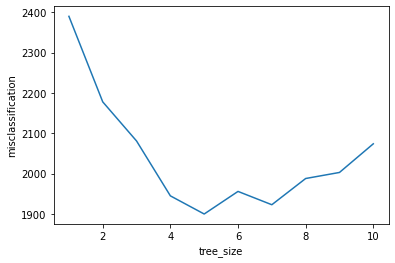

In [8]:
dt_old = DecisionTreeClassifier()
dt_old.fit(train_features, train_labels)
scores = cross_val_score(dt_old, train_features, train_labels, cv=10)
print("Total sample accuracy mean: {:.3f} (std: {:.3f})".format(scores.mean(),scores.std()),end="\n\n" )
misclassification = []
for i in range(1,11):
    #print(i)
    parameters = {'max_depth':range(i,i+1)}
    clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
    clf.fit(train_features, train_labels)
    tree_model = clf.best_estimator_
    misclassification.append(clf.best_score_)
for i in range(len(misclassification)):
    misclassification[i] = int((1-misclassification[i])*len(train_features))
    
#print(misclassification)
tree_size = [1,2,3,4,5,6,7,8,9,10]

plt.plot(tree_size, misclassification)
plt.xlabel('tree_size')
plt.ylabel('misclassification')
plt.show()

In [9]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(train_features ,train_labels)
train_predict = clf.predict(train_features)
test_predict = clf.predict(test_features)
test_labels = test_labels.to_numpy()
errorCalculate(train_labels,train_predict)
errorCalculate(test_labels,test_predict)

correct case: 6438 .Wrong case: 1818 .
correct case: 2712 .Wrong case: 826 .


0

In [10]:
f1_score(test_labels,clf.predict(test_features))


0.7650739476678042

In [12]:
accuracy_score(test_labels,clf.predict(test_features))

0.7665347654041832

In [13]:
filename = 'flu_DecisionTreeClassifier.sav'
joblib.dump(clf, filename)

['flu_DecisionTreeClassifier.sav']